In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set(style='white', rc={'figure.figsize':(8,5)})
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [127]:
df_first = pd.read_csv('C:/ai_x/download/부동산_250213/지역_연도별_평당가격.csv', encoding='cp949')

In [128]:
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

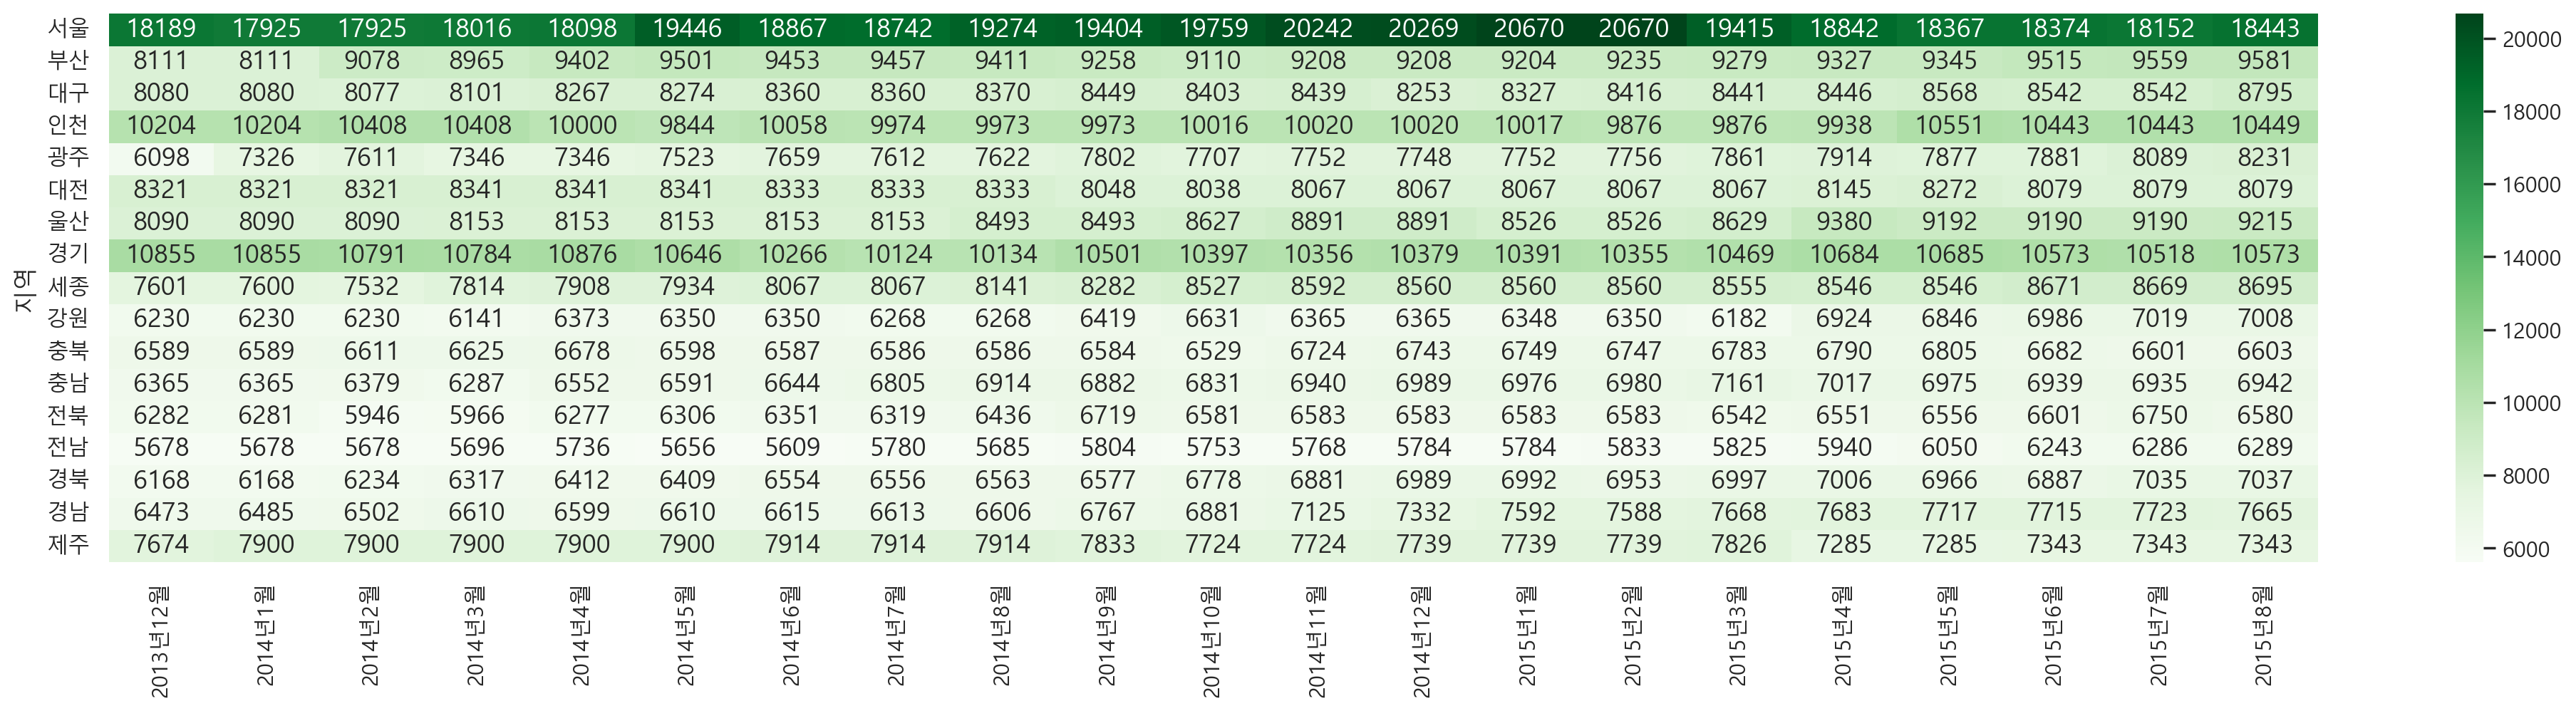

In [129]:
plt.figure(figsize=(25, 5))
sns.heatmap(data=df_first.set_index(keys='지역'),cmap='Greens', annot=True, fmt='.0f', annot_kws={'size':13})
plt.show()

In [164]:
df_last = pd.read_csv('C:/ai_x/download/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')

In [166]:
def nandel(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)

In [167]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(nandel)

In [169]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [170]:
df_last.drop(['제곱미터당분양가격','분양가격(제곱미터)'], axis=1, inplace=True)

In [162]:
df_last.head()

,지역명,평당분양가격,연도,월
0,서울,19275.3,2015,10
1,서울,18651.6,2015,10
2,서울,19410.6,2015,10
3,서울,18879.3,2015,10
4,서울,19400.7,2015,10


In [171]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','').str.replace('제곱미터','㎡').str.replace('초과','~').str.replace('이하','').str.replace(' ','')

In [138]:
df_last.drop('규모구분', axis=1, inplace=True)

In [139]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~


In [140]:
df_last = df_last[['지역명','전용면적','연도','월','평당분양가격']]
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7


In [141]:
df_last

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25419.9
9091,제주,60㎡,2024,8,NaN
9092,제주,60㎡~85㎡,2024,8,24799.5
9093,제주,85㎡~102㎡,2024,8,NaN


In [142]:
df_last.pivot_table(index='연도',columns='지역명', values='평당분양가격')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


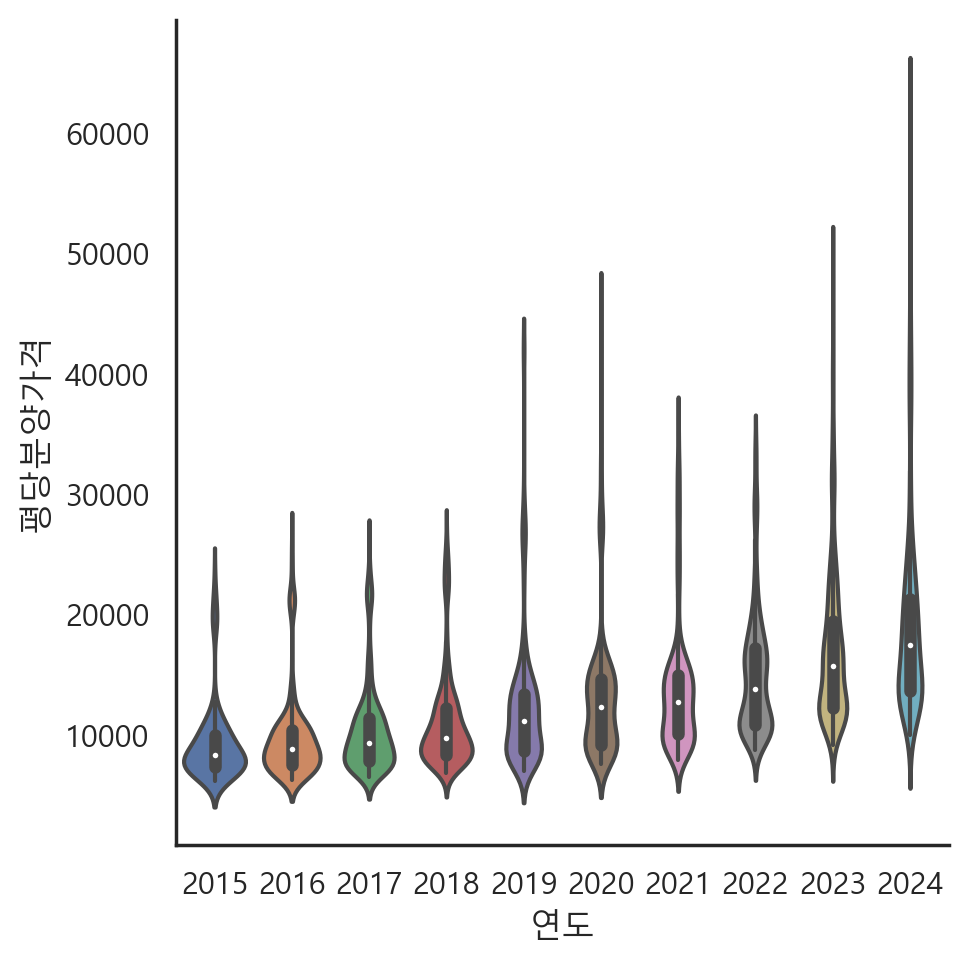

In [143]:
sns.catplot(data=df_last, x='연도',y='평당분양가격',kind='violin')
plt.show()

In [144]:
df_first.pivot_table

<bound method DataFrame.pivot_table of     지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
0   서울     18189    17925    17925    18016    18098    19446    18867   
1   부산      8111     8111     9078     8965     9402     9501     9453   
2   대구      8080     8080     8077     8101     8267     8274     8360   
3   인천     10204    10204    10408    10408    10000     9844    10058   
4   광주      6098     7326     7611     7346     7346     7523     7659   
5   대전      8321     8321     8321     8341     8341     8341     8333   
6   울산      8090     8090     8090     8153     8153     8153     8153   
7   경기     10855    10855    10791    10784    10876    10646    10266   
8   세종      7601     7600     7532     7814     7908     7934     8067   
9   강원      6230     6230     6230     6141     6373     6350     6350   
10  충북      6589     6589     6611     6625     6678     6598     6587   
11  충남      6365     6365     6379     6287     6552     6591     6644   

In [145]:
df_last.head(2)

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6


In [146]:
df_first_melted = df_first.melt(id_vars='지역', var_name='연도월',value_name='평당분양가격')

In [147]:
df_first_melted['연도'] = df_first_melted['연도월'].map(lambda data : int(data.split('년')[0]))
df_first_melted['월'] = df_first_melted['연도월'].map(lambda data : int(data.split('년')[1][:-1]))
df_first_melted.drop('연도월',axis=1,inplace=True)
df_first_melted

,지역,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [148]:
df_first_melted['지역명'] = df_first_melted['지역']
df_first_melted.drop('지역',axis=1,inplace=True)

In [149]:
df_first_melted = df_first_melted[['지역명','평당분양가격','연도','월']]
df_first_melted

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [172]:
df_last = df_last[['지역명','평당분양가격','연도','월']]
df_last['평당분양가격'] = df_last.groupby(['연도','지역명'])['평당분양가격'].transform(lambda x : x.fillna(x.median()))
df_last

,지역명,평당분양가격,연도,월
0,서울,19275.3,2015,10
1,서울,18651.6,2015,10
2,서울,19410.6,2015,10
3,서울,18879.3,2015,10
4,서울,19400.7,2015,10
...,...,...,...,...
9090,제주,25419.9,2024,8
9091,제주,24786.3,2024,8
9092,제주,24799.5,2024,8
9093,제주,24786.3,2024,8


In [173]:
df = pd.concat( [df_first_melted,df_last] )
df = df.reset_index(drop=True)

In [174]:
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
9447,제주,25419.9,2024,8
9448,제주,24786.3,2024,8
9449,제주,24799.5,2024,8
9450,제주,24786.3,2024,8
